# What is the difference between the ratio of students to computers in 2009 and 2019 school years?

## Step One: Inputting the data

I got this data from the fifth page (according to the report) for the 2009 datasets and the fifteenth page (counting each page) from the 2019-20 datasets. Both of these datasets are computed by taking the number of students in all teachers' classrooms or all public schools (depending on the dataset) by the total number of computers that students can use. 

For the 2009 dataset, it was a collection of 3,306 teachers (~80% of those they reached out to) in the United States that replied. As for the 2019 data set, they have reported to have sent the survey to 1,300 public schools in the United States asking for "the person in the school who knew the most about the use of technology for teaching and learning in the school should answer." They did not specify how many actually replied to the survey. 

Since I only am using a select few portions of the datasets from each report, I decided to hardcode the information in dictionaries to keep the notebook as clean as possible and only input the data I will be using in the analysis. 

To answer the first question, I recorded the ratio of student to total computers, both already in and could be brought, in the classroom in the 2008-2009 school year, and number of students per computer they can access for 2019-20. From the looks of it, the ratios look relatively similar despite the ten year difference of computer affordances in schools and education.

In [91]:
# 2009 data that can be compared to 2019-20 dataset (there is more in this category but I only used what I am going to be comparing)
rawcomputerinclass2009 = {"All Public School Teachers": 1.7, 
                       "Elementary": 1.7, "Secondary": 1.6, 
                       "Less than 300pop": 1.6, "300-999pop": 1.7, "1,000morepop": 1.6, 
                       "City": 1.8, "Suburban": 1.6, "Town": 1.8, "Rural": 1.6, 
                       "Less35Freelunch": 1.5, "35-49Freelunch": 1.7, "50-74Freelunch": 1.8, "75moreFreelunch": 1.8}

# 2019-20 dataset that can be compared to 2009 dataset. This dataset had less categories than 2009, so what this has is what 2009 has
# The differences is the how the instructional level is spreadd as well as amount of students are enrolled in a school
rawcomputerinclass2019 = {"All Public Schools": 1.1, 
                       "Elementary": 1.1, "Middle School": 1.0, "High School/Other": 1.0, 
                       "Less than 300pop": 1.0, "300-499pop": 1.1, "500-999pop": 1.1, "1,000morepop": 1.1, 
                       "City": 1.1, "Suburban": 1.1, "Town": 1.1, "Rural": 1.0, 
                       "Less35Freelunch": 1.1, "35-49Freelunch": 1.1, "50-74Freelunch": 1.1, "75moreFreelunch": 1.1}

As we have seen, the 2019 report spreads out the categories differently and the titles and data should represent the same amount of data. So the next step is to merge the data in the 2019-20 data set to match how the 2009 dataset is already set up as.

I decided to keep the first "All Public..." different so I can discern which data set is which as I analyze the two as well as keep as close to the actual results as possible. 

To merge the two kinds of data together, I used the two ratios and took the average of them to put them as one. Since both the Middle School and High School/Other are both 1.0, it was easy, they are the same, so the result is the same number. This is also true with Enrollment size. As 300-499 and 500-999 is 1.1, the average is the same as well. 

In [92]:
# new merged 2019-20 dataset
rawcomputerinclass2019 = {"All Public Schools": 1.1, 
                       "Elementary": 1.1, "Secondary": 1.0, 
                       "Less than 300pop": 1.0, "300-999pop": 1.1, "1,000morepop": 1.1, 
                       "City": 1.1, "Suburban": 1.1, "Town": 1.1, "Rural": 1.0, 
                       "Less35Freelunch": 1.1, "35-49Freelunch": 1.1, "50-74Freelunch": 1.1, "75moreFreelunch": 1.1}

## Step Two: Hypotheses for a T-Test 

Since I want to see if these two datasets are statistically significant different, I have two hypotheses:
- Null: There is no significant difference between the 2009 and 2019 values for technology usage in the classrooms.
- Alternative: There is a significant difference between the 2009 and 2019 values for technology usage in the classrooms.

I wasn't sure exactly how to go about a t-test in python, especially given that I only have one data point for each of the shared categories for the two school years. **Due to this uncertainty I used AI to help me write this code.**

This code is completing the significance test on whether the access to technology for students in 2009 compared to 2019 is significant or not. I first imported a module that can do statistical analysis from my understanding. According to ChatGPT ``scipy.stats`` is a submodule of ``scipy`` that can complete scientific and technical computing[5]. 

The next part is due to my personal want of keeping "All Public School Teachers" and "All Public Schools" separate. It holds the two data points as separate to add into the analysis. 

``categories`` holds the names of the dictionary keys I have used for the raw data input so the computer understands what it is testing on in each set we give it. According to ChatGPT, a paired t-test needs paired data, meaning that each part of each dataset needs to correspond to a value in the other. 

I changed the code from single code lines to expanded because it makes more sense to me completely written out as well as easier for others to understand what is happening in each loop. The lists ``computerinclass[date]`` take the data that I hard coded in and add it into itself, only taking the values and not the keys so the function can run properly. I manually added the keys so it wouldn't confuse me or other readers on what the numbers stand for. 

The last two lines are the actual t-test itself and reporting the information from the function in ``scipy.stats`` just called ``stats`` in the program. According to ChatGPT, the function ``.ttest_rel`` returns an object holding both the statistic and the p-value of the t-test. To make it easier, the double variable is to gather both the values at the same time. 

Lastly, I print out the results the test has received in a line. 

In [93]:
# DISCLAIMER: CHATGPT helped with this anaylsis!

# Import the functions for the actual test
import scipy.stats as stats

# Data for "All Public School Teachers" and "All Public Schools" to check separately
teacher_value_2009 = rawcomputerinclass2009["All Public School Teachers"]
school_value_2019 = rawcomputerinclass2019["All Public Schools"]

# Paired data categories for the paired t-test analysis
categories = ["Elementary", "Secondary", "Less than 300pop", "300-999pop", "1,000morepop", "City", "Suburban", "Town", 
              "Rural", "Less35Freelunch", "35-49Freelunch", "50-74Freelunch", "75moreFreelunch"]

# Values for each category in 2009 dataset
computerinclass2009 = []
for category in categories:
    computerinclass2009.append(rawcomputerinclass2009[category])

# Values for each category in 2019 dataset
computerinclass2019 = []
for category in categories:
    computerinclass2019.append(rawcomputerinclass2019[category])

# Perform a paired t-test on the paired data
t_statistic_paired, p_value_paired = stats.ttest_rel(computerinclass2009, computerinclass2019 )

# Display results for paired data
print("Paired T-Test Results: " + str(t_statistic_paired))
print("P-value: " + str(p_value_paired))

Paired T-Test Results: 23.6981011897578
P-value: 1.9084243992470186e-11


## Step Three: Understanding the Findings



Given the high T-Test result of 23.70, the difference between the technology access in 2009 for students and 2019 is substantial. While the P-value of 1.91 × 10⁻¹¹ is very, very small (smaller than any significance level), suggesting that the difference we have seen between the two school years is not due to random chance, such as less or more students in either year. 

While this is an unusual t-test because I don't have the complete raw data of both reports to have a standard error, it's interesting to know how different these two years are in access to computers. As I noted above, there wasn't a very clear difference (to me) as I was coding the data points in; they were all in the 1 to 1.8 range. I didn't think they were all that different. However, given this test and thinking more of what the ratios stand for, there is a big difference with these numbers. 

In 2009, there were a little less than one computer per *two* students, whereas there was about an equal ratio between students and computers in 2019. 

## Step Four: Visualizations 
I would like to create a visualization of each school year and how much technology was accessible to students. I have decided to first use the first data point from each report because they are the overall for both years. 

To create the graphs, I need to import a graphing function first. The next step is to put the data I want to compare in a graph in a way that the module can read it. I decided to do a simple dictionary of "All Schools..." data points. 

After creating the graph, I save the graphing keys and values in a variable to use the data to put the final numbers on top of the bars. To fill the graph, I label each of the axes and title before showing it. 

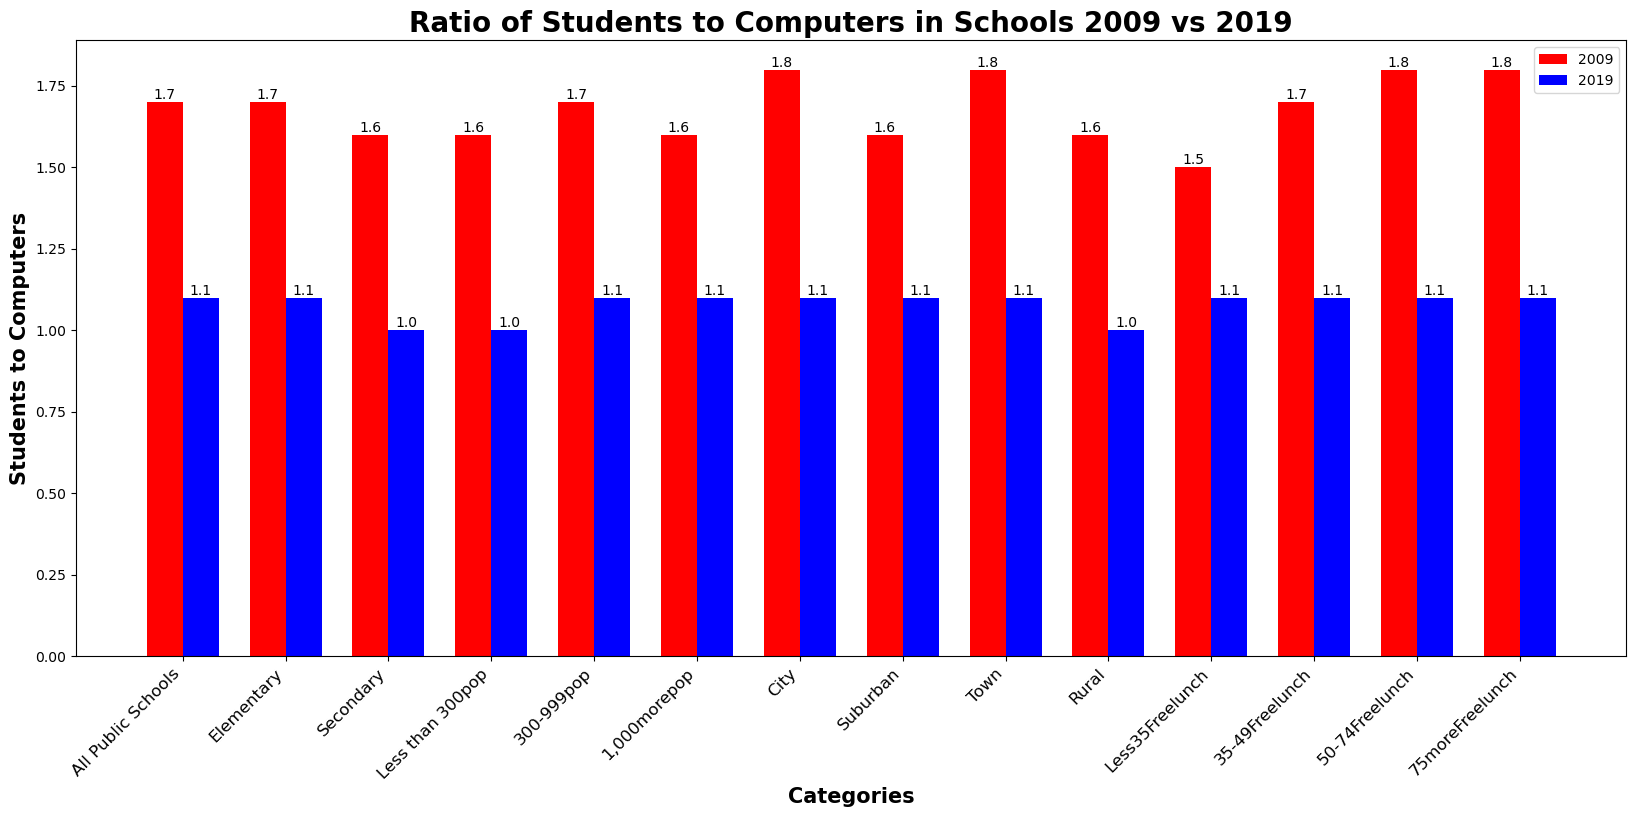

In [108]:
# module to create the graphs
import matplotlib.pyplot as plt
# module to help with the format of the data into a single graph
import numpy as np

# create categories for both values using 2019 to keep it more accurate for both of them
categories = list(rawcomputerinclass2019.keys())

# take the values from both of the dictionaries
values_2009 = list(rawcomputerinclass2009.values())
values_2019 = list(rawcomputerinclass2019.values())

# give each of the bars a position on the x-axis
x_pos = np.arange(len(categories))

# give the figure a size
plt.figure(figsize = (20, 8))

# give the bars a width
bar_width = 0.35

# plot the data to each of the bars, giving the colors of the reports to the right year
bars2009 = plt.bar(x_pos - bar_width / 2, values_2009, bar_width, label = "2009", color = "red")
bars2019 = plt.bar(x_pos + bar_width / 2, values_2019, bar_width, label = "2019", color = "blue")

# for both datasets, get the height of the bars to put the ratio on top of the graph to make the information clearer to the reader
for bar in bars2009:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha = "center", va = "bottom", fontsize = 10)

for bar in bars2019:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha = "center", va = "bottom", fontsize = 10)

# Adding labels and title 
plt.xlabel("Categories", fontweight = "bold", fontsize = 15)
plt.ylabel("Students to Computers", fontweight = "bold", fontsize = 15)
plt.title("Ratio of Students to Computers in Schools 2009 vs 2019", fontweight = "bold", fontsize = 20)

# put the categories under the x-axis and rotate them to read them better
plt.xticks(x_pos, categories, rotation = 45, ha = "right", fontsize = 12)

# Add a legend
plt.legend()

# Save and Show the chart
plt.savefig("Ratio of Students to Computers in Schools 2009 vs 2019.png")
plt.show()

While this graph does inform users if they understand the data I am working with and what the labels means, I feel like this graph doesn't do the best job at showing the differences between the school years in a single glance. 

Instead, I worked in Figma and created my own graphic to more clearly show the report findings on student to computer ratio for just the ``All Public School`` category. With this, I rounded the numbers up and down (2009 was a 2:1 and 2019 was a 1:1) because it's easier to create and much easier to see the difference to the layman. 

Below is code that displays the PDF graphic I created here so I can show a side by side comparison of the visualizations. I first bring in another module that will help display the PDF I have imported into the notebook. Next I call the ``display()`` function by calling the title of the file and how large I want it to be displayed (it may take a moment to load in the window). 

In [95]:
# Import the module to display a PDF
from IPython.display import IFrame
# path to the PDF and demensions of the window
pdf_file = "Student to Computer Ratio Comparison.pdf"
display(IFrame(pdf_file, width = 800, height = 600))

This graphic is saved in the notebook as ``Student to Computer Ratio Comparison.pdf``.

# What is the different technology used in learning in schools ten years apart?

## Step One: Input the data

The two datasets that I have found record the technology that students use differently and due to this I am going to show what technologies are being used in each year separately. I chose to do this instead because I find this is an important aspect of how computers are being used in schools in the comparison. However, since the two reports don't have the same measurements or recording data, it's hard to do a paired analysis with them. 

2009:
This data is already in percentages of teachers that have access to the devices and how (either in the classroom all the time or must be brought in). The next is a percent of that amount of teachers who use the device often. This data was found on page 7-8, report numbered. 

2019:
This data is a percent of schools which online resources are available to their students. This was found in Table A-4 on page A-6 through A-8, report numbered. 

In [96]:
# list in the dictionary key: [as needed, in classroom everyday, of the two percentages the device is used sometimes/often]

availabiltytechnology2009allschools = {"LCD/CLP projector": [36, 48, 72], "Videoconference unit": [21, 1, 13], 
                                       "Interactive whiteboard": [28, 23, 57], "Classroom repsonse system": [22, 6, 35], 
                                       "Digital camera": [64, 14, 49], "MP3 player/'iPod": [18, 5, 36], 
                                       "Document camera": [22, 17, 56], "Handheld device": [8, 4, 50]}

# list in dictionary key: [not at all, small extent, moderate extent, large extent]
onlinetools2019allschools = {"Interactive textbooks": [15, 34, 35, 15], 
                             "Non-interactive ('click-through') textbooks": [25, 43, 27, 5], 
                             "Supplemental materials": [3, 31, 46, 20], 
                             "Self-contained instructional packages": [12, 33, 34, 21], 
                             "Interactive experiences": [21, 58, 19, 2], 
                             "Resources that teachers locate themselves": [1, 14, 47, 39], 
                             "Online materials teachers create themselves": [5, 39, 37, 20]}


## Step Two: Understanding the differences of Data

This took me a while to understand how the results actually differed because I didn't quite understand how the 2009 report was giving the results out. From what I understand, the first two numbers are the percentages of teachers that have access to the device either accessed by request or already in the classroom. The last number is then a percentage of the first two numbers combined of how many teachers use that device. 

### Step Two (Part 1): Reordering the Data to Match
Because of this, I have decided to do a little bit of shuffling of the data to match the 2019 report. The 2019 report seems to be a single percentage of what online resources are used in schools in 2019. To "match" this report, I will take the first two percentages to add up the percent of teachers who have access to the device (either through request or always in the classroom). With those who have access, a new percentage is taken of that group of who use it sometimes or often; for which I will multiply the two percents to get the percent of all teachers in the report who have access and use it sometimes or often. 

Lastly, I am going to take the moderate extent and large extent numbers from the 2019 report and add them together to somewhat match the "sometimes or often" as designated in 2009. There isn't a mathematical reason why, but my own assumption that moderate and large extent of usage is similar to the sometimes or often usage. 

In [97]:
# create two new dictionaries for the modified data from the reports for both years 
techusedin2009 = {}
onlinetoolsin2019 = {}

# go through the 2009 data to do as I explained above
for device, lst in availabiltytechnology2009allschools.items():
    # first find the percentage of how many teachers have the device availible to them (either by request or in classroom)
    availible = lst[0] + lst[1]
    # now find the percent of all teachers from the report that use the device often or sometimes
    deviceusedoftensometimes = availible * (lst[2] / 100)
    # add the rounded percent of device being used to the dictionary still under the device name
    techusedin2009[device] = round(deviceusedoftensometimes)

# go through the 2019 data 
for tool, lst in onlinetools2019allschools.items():
    # since the 2019 report uses four extent of usage and the 2009 doesn't have a clear extent of usage, I have to make a couple assumptions
    # I am taking the assumption that "sometimes or often" is approximately equivalent to a moderate and large extent of usage  
    # to keep the data set similar to the new 2009 dictionary, I add up the two percentages from moderate and large extent
    # and put the new percent in the new 2019 data set under the same tool name
    sometimesoftenuse = lst[2] + lst[3]
    onlinetoolsin2019[tool] = sometimesoftenuse

## Step Three: Visualization Comparison*

*disclaimer: some of this code was generated by ChatGPT [5]

Since there is no overlap in 2009 "technology" access and 2019 "online tool" access, I thought it would be interesting to see the percentages of teacher/school access to the different technology on the same graph. While we can't compare them directly, we can see what was the most used technology and what each school year labeled as "computer."

My first step is to import another module that can help me with numerical analysis which is numpy. The next is to rearrange the data so matplotlib can read the data and create the graphic I want to represent the data I have found. 

In [98]:
# create lists of the keys and values for each of the data sets to import them into the graphic
labels_2009 = list(techusedin2009.keys())
values_2009 = list(techusedin2009.values())

labels_2019 = list(onlinetoolsin2019.keys())
values_2019 = list(onlinetoolsin2019.values())

### Step Three (Part 1)

To actually get the datasets on the same graph, both the lists need to be combined in relation to what they hold, so the values for 2009 and 2019 need to be in the same list and the same with the keys for both years. 

``np.arrange()`` there is a number generated for each bar on the x-axis for the two different datasets. The first gets the labels from the 2009 dataset while the second grabs the 2019 amount and adds it to the positions already established from the first list.  

In [99]:
# combine the two year datasets
labels_combined = labels_2009 + labels_2019
values_combined = values_2009 + values_2019

# create an array for the positions of the bars on the x-axis
x_pos_2009 = np.arange(len(labels_2009))
x_pos_2019 = np.arange(len(labels_2009), len(labels_combined))

### Step Three (Part 2)

The next step is to actually create the graphic with the data from both the datasets that are in the combined lists. The first thing to make is the actual figure and determine a size for it. 

To plot the data, I take the seperate data lists for each year to label them and color so the reader can differentiate the two different year's data. To give the width, I used 0.5 as 1 overlapped the bars too much for it to be a clear data graphic. I again used the colors the reports used. To include the labels I assigned each dataset, I added a legend.

Next is to include the labels for the graph, including the x and y axis and the title. Since the titles of the technology/tools are long, I decided that it would be easier to read if the x-labels were slightly tilted. With this, I needed to keep the alignment to the right to prevent overlap of the x-values. 

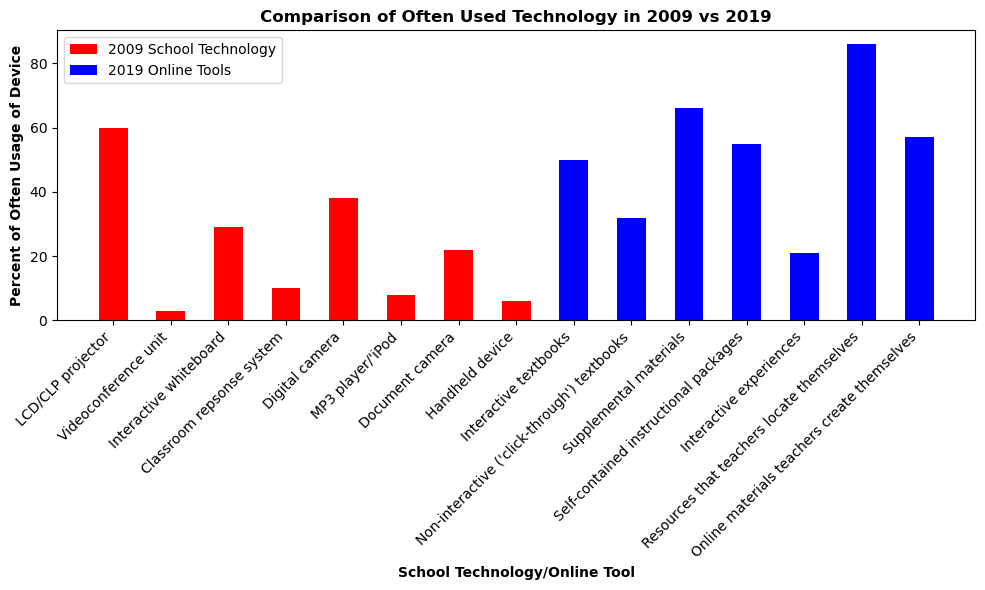

In [100]:
# create the graphic
plt.figure(figsize = (10, 6))

# plot the data individually 
plt.bar(x_pos_2009, values_2009, 0.5, label = "2009 School Technology", color = "red")
plt.bar(x_pos_2019, values_2019, 0.5, label = "2019 Online Tools", color = "blue")

# Add a legend for the two different datasets
plt.legend()

# label the graph 
plt.xlabel("School Technology/Online Tool", fontweight = "bold")
# label the x-values with the combined labels, rotate and align to the right to help readability and prevent overlap
plt.xticks(np.concatenate((x_pos_2009, x_pos_2019)), labels_combined, rotation = 45, ha = "right")
plt.ylabel("Percent of Often Usage of Device", fontweight = "bold")
plt.title("Comparison of Often Used Technology in 2009 vs 2019", fontweight = "bold")

# show and save graph into the notebook
# tightens the graph to keep it condensed
plt.tight_layout()
plt.savefig("Comparison of Technology Used in 2009 vs 2019.png")
plt.show()

# Further Data Visualizations:

For my final presentation in this class, in which I presented what I completed by the last day of physical class and what I wanted to complete before this final project was due, I had said I wanted to complete a couple more comparisons. However, as I looked over the datasets, I realized that so many of these reports were just not comparable because the findings don't line up. My presentation can be found [here](https://docs.google.com/presentation/d/1Y6JjmHqIR88o0_s50zYZJvUxh4GLGwtd028gn8AEDLQ/edit?usp=sharing).

Instead, I decided to create two more visualizations of the difference in technology between the two school years:

- 2009: top five online softwares teachers used in class
- 2019–20: differences of student access to computers across the instructional level of schools

## What are the top five software and/or Internet sites for classroom preparation, instruction, or administrative tasks that teacher's use? 

### Step One
As given on page 11 and 12, report numbered, there are a list of different types of software and internet sites that teachers may use for classroom preparation, instruction, or administrative tasks. I will input these as a dictionary, sort. 

In [101]:
# adding all the softwares and internet sites from 2009 report
sometimesoftensoftware2009 = {"Word processing Software": 96, "Database management software": 44, 
                              "Spreadsheets and graphing programs": 61, "Software for managing student records": 80, 
                              "software for desktop publishing": 53, "Graphics, image-editing software": 40, 
                              "Software for making presentations": 63, "Software for administering tests": 44, 
                              "Simulation and visualization programs": 33, "Drill/practice programs/tutorials": 50, 
                              "Subject-specific programs": 59, "The Internet": 94, "Blogs and/or wikis": 16, 
                              "Social networking websites": 8}

# sort the orginal dictionary based on the second item and make sure it is in desending order
sometimesoftensoftware2009 = sorted(sometimesoftensoftware2009.items(), key = lambda x: x[1], reverse = True)

# create a new dictionary of just the top five items and percentages
topsoftwares = dict(sometimesoftensoftware2009[:5])

### Step Two

*disclaimer: I wanted to break the x-axis lines up like I do in the next visualization for 2019, but I tried to do it after I implemented the code and kept breaking it. I decided to go through and solve it and keep it as it rotated, despite it being harder to read. 

To actually create the visuals I still use the matplotlib to determine the size of the graph (this code is reused from my other graph code and I modified it for each different graphic). To plot the values and keys together, I put it into a new variable to then also use to put the actual percentage at the top to better represent the data. 

To avoid overlap of the a-axis values, I rotated them slightly to still be able to read them. 

Lastly, I name all the axes, save the picture under ``Top Five Software and Internet Sites.png`` and display it here.

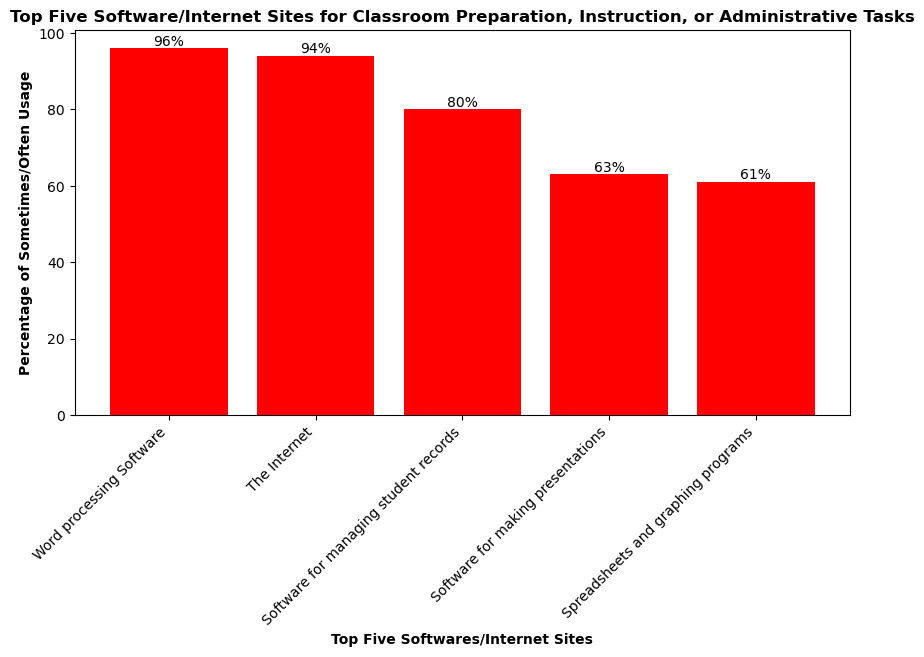

In [102]:
# create the graph and grab the keys and values
plt.figure(figsize = (10, 5))

# save the data in a varaible to get the values and set to color 
bars = plt.bar(topsoftwares.keys(), topsoftwares.values(), color = "red")

# Put the values above each category
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.0f}%", ha = "center", va = "bottom", fontsize = 10)

# rotate the technology used to be able to read them without overlap and keeping a right alignment
plt.xticks(rotation = 45, ha = "right")

# Adding labels and title
plt.xlabel("Top Five Softwares/Internet Sites", fontweight = "bold")
plt.ylabel("Percentage of Sometimes/Often Usage", fontweight = "bold")
plt.title("Top Five Software/Internet Sites for Classroom Preparation, Instruction, or Administrative Tasks", fontweight = "bold")

# Save and Show the chart
plt.savefig("Top Five Software and Internet Sites.png")
plt.show()

## How does the percentage of computers for students use change in the different instructional levels of school?

### Step One
On Table A-2 (page 15, counting all pages), the same that I used in the first analysis, there is a "percent of computers students use" section that determines what the amount of computers students have to do various things with. In this graphic, I want to see if the different levels of access changes among the different instruction levels (elementary, middle school, and high school).

First I import the data as I usually do with the list containing the different instruction levels. 

Running the code the first time, as the bars for each category is wider (there are three for each), I thought it would be easier to read if the x-axis wasn't rotated, but broken up into multiple lines. The ``categories`` variable does just this, breaking the names up a little more.  

The last part of setting up the data is to give each bar a position on the graph like I did in the second analysis. 

In [103]:
# dictionary of data with list [elementary, middle, high]
percentcomputeruse = {"Assigned to individual students to carry with them": [22, 42, 45], 
                      "Assigned to stay in a specific classroom": [50, 33, 29],
                      "Move from classroom to classroom": [18, 16, 14],  
                      "In resource rooms, computer labs, library/media center": [10, 9, 11], 
                      "In other locations": [0, 0, 0]}

# line break the catgeories
categories = [
    "Assigned to individual\nstudents to carry with them", "Assigned to stay in a\nspecific classroom",
    "Move from classroom\nto classroom", "In resource rooms,\ncomputer labs,\nlibrary/media center", 
    "In other locations"]

# create a list of just the values to use
values = np.array(list(percentcomputeruse.values()))

# give the legend values
school_levels = ["Elementary School", "Middle School", "High School"]

# get the number of items and width of the bar defined
n_items = len(school_levels)
bar_width = 0.25
n_items = values.shape[1]  

# give each bar a position on the x-axis
x_pos = np.arange(len(categories)) 

### Step Two

The create the actual visualization is pretty much the same as all the other times*. I first determine the figure and its size. 

*use of AI tools was used here to create a multi-bar graph

Next, go through the dictionary and create a ``bars`` variable to use later in getting the percentages at the top of each bar like the other graphs as well. Before that, I need to give the bars the position I gave them, get the height through the values through the loop number, width is 0.5 to not overlap each other, and get the labels from above. Still in the loop, add the percent on the top of each bar to make it clear to the reader what the differences are.

Lastly, add the titles, save, and show. 

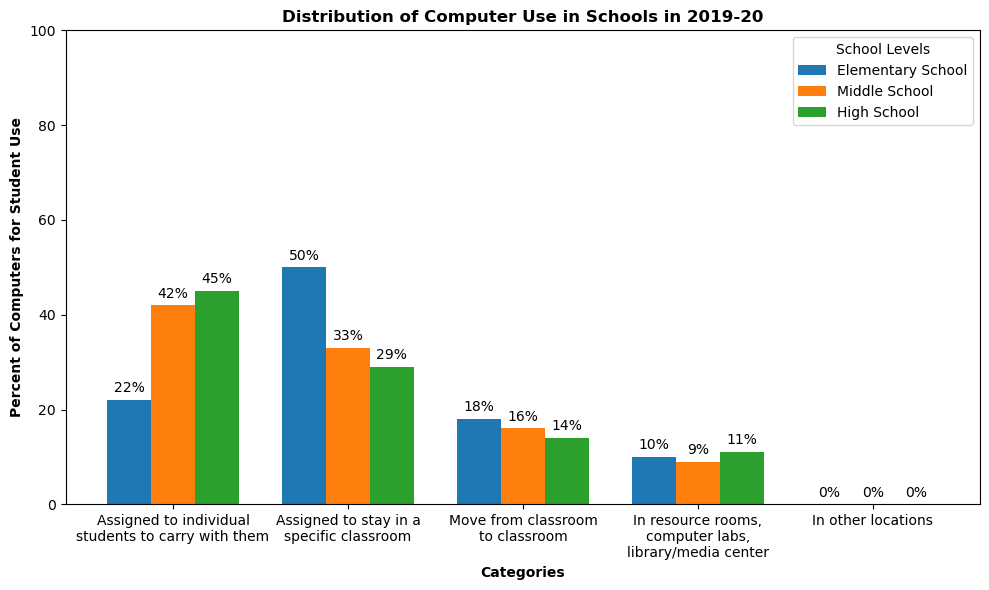

In [104]:
# Plot bars for each item
plt.figure(figsize = (10, 6))

for i in range(n_items):
    bars = plt.bar(
        x_pos + i * bar_width, values[:, i], bar_width, label=school_levels[i], color=f'C{i}')
    # Add percentages at the top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.0f}%", ha = "center", va = "bottom")

# Add labels and title
plt.xlabel("Categories", fontweight = "bold")
plt.ylabel("Percent of Computers for Student Use", fontweight = "bold")
plt.title("Distribution of Computer Use in Schools in 2019-20", fontweight = "bold")

# Adjust x-axis ticks to match grouped bars
plt.xticks(x_pos + bar_width * (n_items - 1) / 2, categories, ha = "center", wrap = True)

# Set y-axis to 0–100%
plt.ylim(0, 100)

# Add legend
plt.legend(title = "School Levels")

# Save and show plot
plt.tight_layout()
plt.savefig("Distribution of Computer Use in Schools 2019-20.png", bbox_inches = "tight")
plt.show()

# Endnotes:
1. [National Center for Education Statistics’ Condition of Education Yearly Reports](https://nces.ed.gov/pubsearch/index.asp?PubSectionID=1&HasSearched=1&pubspagenum=1&sort=3&order=0&L1=&L2=&searchstring=condition+of+education&pagesize=100&searchtype=AND&searchcat2=&searchcat=title&searchmonth=1&searchyear=1989&datetype=ge&pubtype=&surveyname=&surveyid=&centername=NCES&center=NCES)
2. Dubé, Adam Kenneth, and Run Wen. “Identification and evaluation of technology trends in K-12
education from 2011 to 2021.” Education and Information Technologies, vol. 27, no. 2, 6
Aug. 2021, pp. 1929–1958, https://doi.org/10.1007/s10639-021-10689-8.
3. Chang, C.-C., Hwang, G.-J., & Tu, Y.-F. (2022). Concept mapping in technology-supported K-12
education: A systematic review of selected SSCI publications from 2001 to 2020. Journal
of Educational Computing Research, 60(7), 1637–1662.
https://doi.org/10.1177/07356331211073798
4. [Annotated Bibliography for HCDE 419](https://drive.google.com/file/d/1aP0KdsLODbQYU-URf3jeheFU4Qu4AU2j/view?usp=sharing)
5. ChatGPT Questions and Answers (used only for clarifying questions and analysis code)